# Linear Regression

This notebook contains the Programming Exercise 1 of the Andrew Ng's course on Coursera.

## Linear Regression with one variable
In this first part we are asked to implement 'Linear regression with one variable' to predict profits of a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
import os
data = pd.read_csv(os.getcwd() + '/ex1data1.txt', header=None, names=['Population', 'Profit'])

### Explore data

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Both Population and Profit have a multiplying factor of 10.000

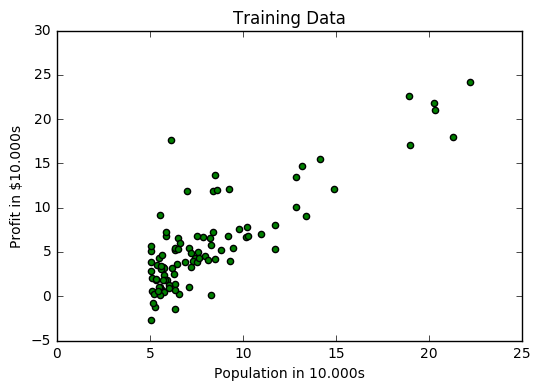

In [283]:
# scatter plot of the data (using plot function from pandas)
axes = data.plot(kind='scatter', 
                 x='Population', y='Profit', 
                 figsize=(6,4), 
                 title='Training Data', 
                 color='green')
axes.set_xlabel("Population in 10.000s")
axes.set_ylabel("Profit in $10.000s")

### Compute Univariate Linear Regression using Gradient Descent

In [7]:
# add a column of '1' to the training set in order to use a vectorized solution
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [58]:
# set X (training data) and y (target)
numCols = data.shape[1]
Xdf = data.iloc[:,0:numCols-1] # all columns except last (iloc allows for an integer-location based indexing)
ydf = data.iloc[:,numCols-1:numCols] # only last column

In [59]:
Xdf.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [60]:
ydf.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [277]:
# convert X,y,theta to np matrices so they can be corretcly used by computeSetCost()
X = np.matrix(Xdf.values)
y = np.matrix(ydf.values)
theta = np.matrix(np.array([0,0],dtype=np.float)) # initilaized to (0,0)
print(X.shape, theta.shape, y.shape)

(97, 2) (1, 2) (97, 1)


In [278]:
# function to compute h(x)
def h(X, theta):
    return X*theta.T # dot product (np.dot(X, theta.T))

# function to compute the cost of the entire set as (1/2m)SUM((X·theta'-y)^2)
# X: mx2 matrix | theta: 1x2 vector | y: mx1 vector
def computeSetCost(X, y, theta):
    insides = np.power((h(X, theta) - y), 2) # vector with all insides values
    return np.sum(insides)/(2*len(X))

In [279]:
# Compute the cost of the initial solution
computeSetCost(X, y, theta)

32.072733877455676

In [280]:
# gradient descent algorithm
def gradientDescent(X, y, thetaStart, alpha, iterations):
    # init stuff
    m = len(y)
    theta = thetaStart # theta values that evolve
    thetaTmp = theta # aux to simultaneuosly update theta
    costPerIteration = [] # to track cost evolution
    
    # compute initial cost and track init state
    costPerIteration.append(computeSetCost(X, y, thetaStart))

    # iterate over num of iterations
    for i in range(iterations):
        
        # simultaneously update theta values
        for j in range(theta.shape[1]):
            thetaTmp[0,j] = theta[0,j] - (alpha/m)*np.sum( np.multiply(h(X,theta)-y,X[:,j]) )
        theta = thetaTmp
        
        # track evolution
        costPerIteration.append(computeSetCost(X, y, theta))
   
    return theta, costPerIteration

In [339]:
# run gradient descent
alpha = 0.01
iterations = 1000
theta = np.matrix(np.array([0,0],dtype=np.float)) # initilaized to (0,0)
thetaFinal, costs = gradientDescent(X, y, theta, alpha, iterations)
print(thetaFinal)

[[-3.25088222  1.12836314]]


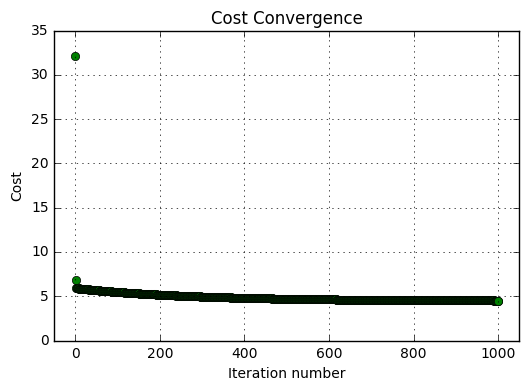

In [340]:
# Plot convergence of cost function
def plotCostConvergence(costs):
    plt.figure(figsize=(6,4))
    plt.plot(range(len(costs)),costs,'go')
    plt.grid(True)
    plt.title("Cost Convergence")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost")
    plt.xlim([-0.05*iterations,1.05*iterations])

plotCostConvergence(costs)

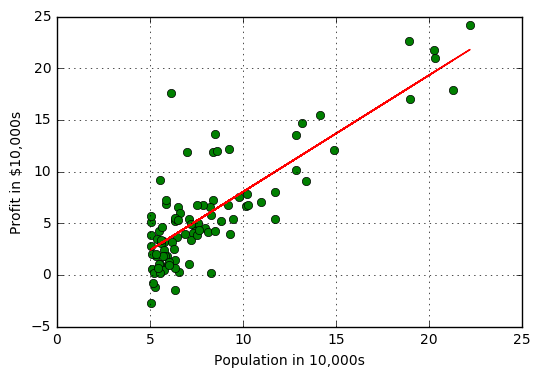

In [341]:
# Plot the regression line
def plotRegressionLine(X,y,theta):
    plt.figure(figsize=(6,4))
    plt.plot(X[:,1], y, 'go')
    plt.plot(X[:,1], theta[0,0] + theta[0,1]*X[:,1], 'r-')
    plt.grid(True)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population in 10,000s')
    plt.xlim([0,25])
plotRegressionLine(X,y,thetaFinal)

[[-3.24139043  1.12730477]]


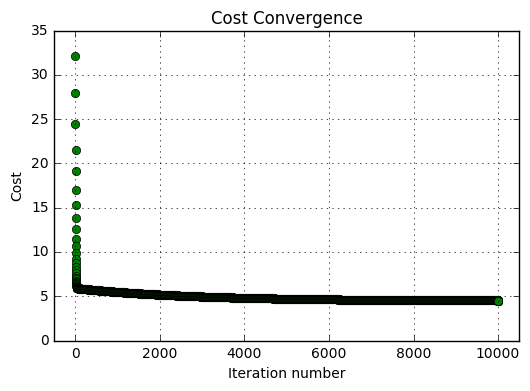

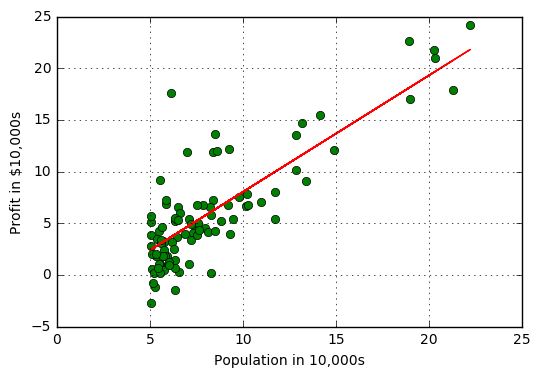

In [342]:
# Explore value of alpha
alpha = 0.001
iterations = 10000
theta = np.matrix(np.array([0,0],dtype=np.float)) # initilaized to (0,0)
thetaFinal, costs = gradientDescent(X, y, theta, alpha, iterations)
print(thetaFinal)
plotCostConvergence(costs)
plotRegressionLine(X,y,thetaFinal)

### 3D plot of cost fucntion J

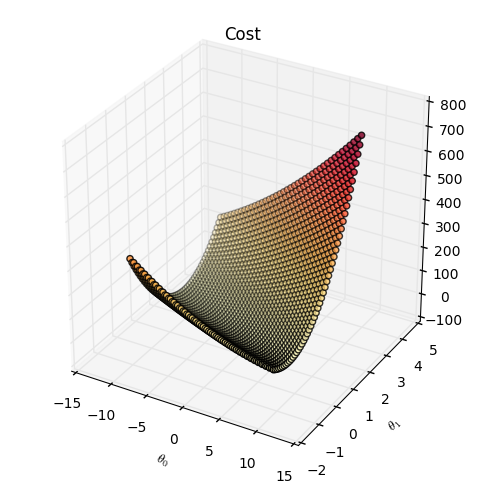

In [355]:
# based on: https://github.com/kaleko/CourseraML/blob/master/ex1/ex1.ipynb

# import necessary for 3D
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# init plot
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# compute values
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for xi in xvals:
    for yi in yvals:
        myxs.append(xi)
        myys.append(yi)
        myzs.append(computeSetCost(X,y,np.array([[xi], [yi]]).T))

# plot as scatter
ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Cost')
plt.show()